## Data Visualization of Walmart Customer Review

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# data initialization
plt.style.use('ggplot')
df = pd.read_csv('/data/customer_reviews2.csv')  # Read in Final Data into data frame

rating_label = ["1 Star", "2 Star", "3 Star", "4 Star", "5 Star"]
rating_data = df['rating'].value_counts().sort_index()

sentiment_label = ["Negative","Positive"]
sentiment_data = df['sentiment'].value_counts().sort_index()

vader_label = ["Negative","Neutral","Positive","Compound"]
vader_data = df[['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound']]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              423 non-null    int64  
 1   vader_neg       423 non-null    float64
 2   vader_neu       423 non-null    float64
 3   vader_pos       423 non-null    float64
 4   vader_compound  423 non-null    float64
 5   name            423 non-null    object 
 6   rating          423 non-null    int64  
 7   verified        423 non-null    bool   
 8   date            423 non-null    object 
 9   title           423 non-null    object 
 10  body            423 non-null    object 
 11  like            423 non-null    int64  
 12  dislike         423 non-null    int64  
 13  sentiment       423 non-null    object 
dtypes: bool(1), float64(4), int64(4), object(5)
memory usage: 43.5+ KB


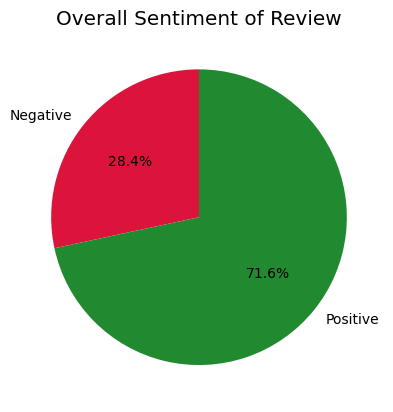

In [5]:
# pie chart for Sentiment

def my_autopct1(pct):
    total = np.sum(sentiment_data)
    val = int (pct * total / 100)
    return f"{pct:.1f}%"

plt.pie(sentiment_data, labels=sentiment_label,startangle = 90, autopct = my_autopct1,colors = ["#DC143C","#218a31"])
plt.title("Overall Sentiment of Review")

plt.savefig('chart1.png') # to export the chart as a png file

plt.show()

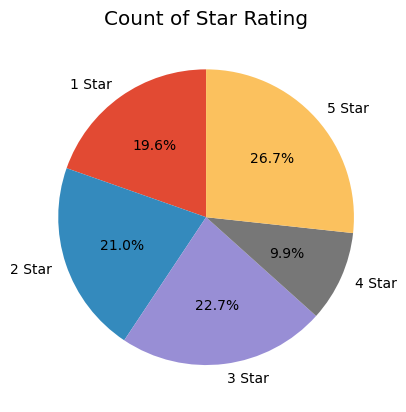

In [6]:
# pie chart for Rating

def my_autopct2(pct):
  total = np.sum(rating_data)
  val = int(pct * total / 100)
  return f"{pct:.1f}%"  # Format string with percentage and value

plt.pie(rating_data, labels=rating_label, startangle=90, autopct=my_autopct2)
plt.title("Count of Star Rating")

plt.savefig('chart2.png') # to export the chart as a png file

plt.show()


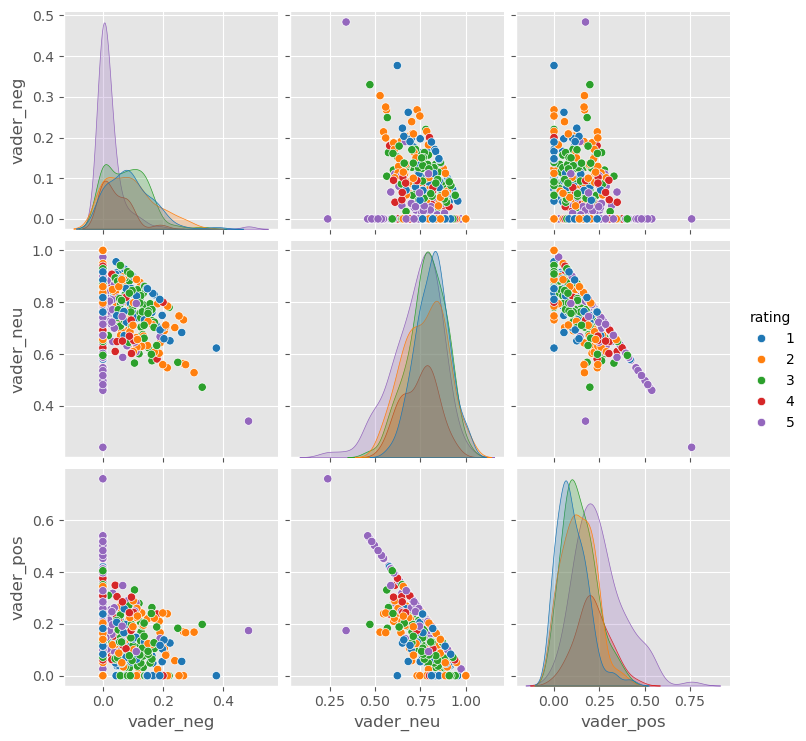

In [7]:
# pair plots to compare 3 components of sentiment values
sns.pairplot(data = df,vars =['vader_neg', 'vader_neu', 'vader_pos'], 
             hue='rating', palette='tab10')

plt.savefig('chart3.png') # to export the chart as a png file

plt.show()

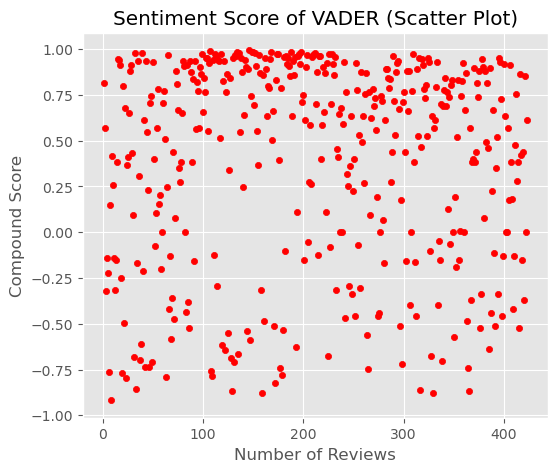

In [8]:
# Scatter plot with colormap (adjust cmap as needed)
df.plot(kind='scatter', x='id', y='vader_compound', figsize=(6,5), color="red") 

plt.title('Sentiment Score of VADER (Scatter Plot)')
plt.xlabel('Number of Reviews')  # Adjust label based on column
plt.ylabel('Compound Score')  # Adjust label based on column

plt.savefig('chart4.png') # to export the chart as a png file

plt.show()


### End of Data Visualization